# WE RATE DOG WRANGLING PROJECT

## Table of Contents 
1. [Data Gathering](#datagat)

    1.1 [Data stored locally](#local)    
    
    1.2 [Data in the web](#web)    
    
    1.3 [Data from API](#API)


2. [Assess](#assess)
    
    2.1 [Visual assessment](#va)
    
    2.2 [Programmatic assessment](#pa)
    
    2.3 [Assessment summary](#as)
    
    
3. [Data cleaning](#datacleaning)


4. [Storing data](#store)


5. [Analyze and Visualize](#a&v) 


6. [Insights from the analysis](#ifa)

In [2]:
# import libraries
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import requests
import seaborn as sns
from timeit import default_timer as timer
import tweepy 
from tweepy import OAuthHandler

## 1 DATA GATHERING
<a id='datagat'></a>

### 1.1 Data stored locally
<a id='local'></a>

In [3]:
# import datasets
archive = pd.read_csv('twitter-archive-enhanced.csv')

### 1.2 Data in the web
<a id='web'></a>
       
The data, 'image_predictions.tsv' is hosted on Udacity's servers.

In [4]:
# Download the file from the web programmatically
from urllib import response


url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)

address = url.split('/')[-1]

with open(os.path.join('', address), mode='wb') as file:
    file.write(response.content)


In [5]:
# read the file
predictions = pd.read_csv('image-predictions.tsv', sep='\t')

### 1.3 Data from an API.
<a id='API'></a>


In [6]:
# create an empty list
df_list = []

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        data=json.loads(line)
        tweet_id=data['id']
        created_at=data['created_at']
        favorite_count=data['favorite_count']
        retweet_count=data['retweet_count']

        df_list.append({'tweet_id': tweet_id,
        'date_created': created_at,
        'favorite_count': favorite_count,
        'retweet_count': retweet_count})


# create a dataframe
tweet_stats = pd.DataFrame(df_list, columns=['tweet_id', 'date_created','favorite_count', 'retweet_count'])

## 2 ASSESS
<a id='assess'></a>

3 datasets
- archive
- predictions
- tweet_stats

Assess the three dataframes both visually and programmatically. 

### 2.1 Visual assessment
<a id='va'></a>

Also open the files in other software: Microsoft Excel to do a visual assessment.

In [7]:
# display archive dataset
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


understanding archive columns

`tweet_id` - digits that uniquely identify a tweet. Extracted from the last part of expanded_url

`in_reply_to_status_id` -  contain the integer representation of the original Tweet’s ID

`in_reply_to_user_id` -  contain the integer representation of the original Tweet’s author ID

`timestamp`- time tweet was sent

`source` - information about device used to tweet	

`text` - actual content of the tweet

`retweeted_status_id` - contain the integer representation of the original Tweet’s ID

`retweeted_status_user_id` - contain the integer representation of the original Tweet’s author ID

`retweeted_status_timestamp` - time of retweet

`expanded_urls`	- tweet url

`rating_numerator`	- dog rating numerator

`rating_denominator` - dog rating denominator

`name` - name of the dog 

`doggo` - dog stage

`floofer` - dog stage

`pupper` - dog stage

`puppo` - dog stage


In [8]:
# display predictions
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True




understanding image_predictions columns.

`tweet_id` - the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921

`jpg_url` - image url

`img_num` - image number

`p1` - the algorithm's #1 prediction for the image in the tweet → golden retriever

`p1_conf` - how confident the algorithm is in its #1 prediction → 95%

`p1_dog` -  whether or not the #1 prediction is a breed of dog → TRUE

`p2` - he algorithm's second most likely prediction → Labrador retriever

`p2_conf` - how confident the algorithm is in its #2 prediction → 1%

`p2_dog` -  whether or not the #2 prediction is a breed of dog → TRUE

`p3` - the algorithm's #3 prediction for the image in the tweet → golden retriever

`p3_conf` - how confident the algorithm is in its #3 prediction → 95%

`p3_dog` - whether or not the #3 prediction is a breed of dog → TRUE


In [9]:
# display tweet_stats
tweet_stats

,tweet_id,date_created,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33695,6976
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29231,5279
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,21974,3466
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,36781,7190
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35165,7723
...,...,...,...,...
2322,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,88,36
2323,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,245,115
2324,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,100,36
2325,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,112,39


understanding tweet_stats columns

`tweet_id` - unique identification number of a tweet

`date_created` - the date the tweet was created

`favourite_count` - number of times a tweet was favorited/liked

`retweet_count` - number of times a tweet was retweeted.

### 2.2 Programmatic assessment
<a id='pa'></a>

#### Archive data

In [10]:
# check the shape
archive.shape

(2356, 17)

In [11]:
# check the info of archive
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# view a sample
archive.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1175,720043174954147842,NaN,NaN,2016-04-13 00:17:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Neptune. He's a Snowy Swiss Mountain F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720043174...,11,10,Neptune,None,None,None,None
545,805826884734976000,NaN,NaN,2016-12-05 17:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He is not a fan of the pupporazz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805826884...,12,10,Duke,None,None,None,None
1787,677565715327688705,NaN,NaN,2015-12-17 19:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Contortionist pup here. Inside pentagram. Clea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677565715...,6,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
1357,703407252292673536,NaN,NaN,2016-02-27 02:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doesn't understand gates. 10/10 so...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703407252...,10,10,None,None,None,pupper,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
882,760290219849637889,NaN,NaN,2016-08-02 01:44:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Rocco. He's doing his best. 13/10 some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760290219...,13,10,Rocco,None,None,None,None
734,781251288990355457,NaN,NaN,2016-09-28 21:56:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He just got yelled at for goin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781251288...,11,10,Oakley,None,None,None,None
2331,666353288456101888,NaN,NaN,2015-11-16 20:32:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a mixed Asiago from the Galápagos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666353288...,8,10,None,None,None,None,None
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,None,None,None


In [13]:
# different unique numerator values
archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [14]:
#different unique demoninator values
archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [15]:
# unique devices used to tweet 
archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [16]:
# check columns with missing values
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
# check summary statistics.
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# numerator ratings counts
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [19]:
# denominator ratings counts
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

#### predictions data

In [20]:
# predictions shape 
predictions.shape

(2075, 12)

In [21]:
# image predictions information
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# check column with null values
predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
# duplicated images
predictions.jpg_url.duplicated().sum()

66

In [24]:
# predictions summary statistics
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### tweet_stats data

In [25]:
# tweet stats shape
tweet_stats.shape

(2327, 4)

In [26]:
# tweet_stats information
tweet_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   date_created    2327 non-null   object
 2   favorite_count  2327 non-null   int64 
 3   retweet_count   2327 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [27]:
tweet_stats.sample(10)

,tweet_id,date_created,favorite_count,retweet_count
44,883482846933004288,Sat Jul 08 00:28:19 +0000 2017,40049,8231
1525,688908934925697024,Mon Jan 18 02:21:04 +0000 2016,1939,708
677,786595970293370880,Thu Oct 13 15:54:28 +0000 2016,8945,2903
1400,697616773278015490,Thu Feb 11 03:02:54 +0000 2016,2887,921
145,862831371563274240,Fri May 12 00:46:44 +0000 2017,17176,4447
2293,666430724426358785,Tue Nov 17 01:40:41 +0000 2015,276,160
2319,666055525042405380,Mon Nov 16 00:49:46 +0000 2015,367,196
1062,737678689543020544,Tue May 31 16:14:39 +0000 2016,4618,1192
1715,679158373988876288,Tue Dec 22 04:35:49 +0000 2015,19363,7218
1873,674644256330530816,Wed Dec 09 17:38:19 +0000 2015,925,241


In [28]:
# summary statistics
tweet_stats.describe()

,tweet_id,favorite_count,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7027.479158,2460.476150
std,6.820795e+16,10919.037874,4167.029258
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1221.000000,492.500000
50%,7.178418e+17,3039.000000,1146.000000
75%,7.986547e+17,8566.500000,2846.000000
max,8.924206e+17,144274.000000,70397.000000


In [29]:
# check for columns wuth null values
tweet_stats.isnull().sum()

tweet_id          0
date_created      0
favorite_count    0
retweet_count     0
dtype: int64

### 2.3 Assessment Summary
<a id='as'></a>

#### 2.3.1 Quality
<a id='qa'></a>
##### archive
- 181 records are retweets
- 78 records are replies 
- rating_numerator column has values we'd term as outliers. Those > 19
- rating_denominator column has values that aren't the base 10
- expanded urls has missing data. Ignore since we already have tweet_id
- timestamp column is in string datatype
- source column has ambiguous text
- some columns will be empty hence not needed. Delete them

##### predictions
- 66 duplicated images

##### tweet_stats
- date_created has erroneous datatype

#### 2.3.2 Tidiness
<a id='ta'></a>
##### archive
- doggo, puppo, pupper, floffer are all dog stages hence should be under one column dog_stage

##### prediction
- p1,p2,p3 -one column (breed) this will be determined by the highest p_conf among p1_conf, p2_conf, and p3_conf. Have another column, confidence, showing the max conf. 
- drop the unnecessary columns.

- join all tables on tweet_id

## 3 Data Cleaning
<a id='datacleaning'></a>

### 3.1 Make a copy of the data

In [30]:
# copies of dataframes
archive_clean = archive.copy()
predictions_clean = predictions.copy()
tweet_stats_clean = tweet_stats.copy()

### 3.2 Clean archive_clean dataset

#### QUALITY#1 archive data contains 181 retweets. 

##### Define
 Remove records containing retweets. We need only original tweets for the analysis.

##### Code

In [31]:
# check number of retweets. They are contained in ['retweeted_status_id', 'retweeted_status_user_id', 
# 'retweeted_status_timestamp'] columns. 
print(archive_clean.retweeted_status_id.notnull().sum())
print(archive_clean.retweeted_status_user_id.notnull().sum())
print(archive_clean.retweeted_status_timestamp.notnull().sum())

181
181
181


In [32]:
# dropping non null values in one of the columns drops the same in the rest
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

##### Test

In [33]:
# check for availability of retweets in archives_clean
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### QUALITY#2 archive data contains 78 replies.

##### Define
Remove reply tweets in the data. They are not the original tweets needed in the analysis.

##### Code

In [34]:
# check for reply tweets. They are contained in ['in_reply_to_status_id', and 'in_reply_to_user_id'] columns
print(archive_clean.in_reply_to_status_id.notnull().sum())
print(archive_clean.in_reply_to_user_id.notnull().sum())

78
78


In [35]:
# drop the non null records in ['in_reply_to_status_id', and 'in_reply_to_user_id'] columns
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]

##### Test

In [36]:
# check for unavailability of reply tweets
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### TIDINESS#1 columns related to retweets in archive_clean are empty

##### Define
Drop columns related to the retweets column

##### Code

In [37]:
# drop empty columns related to retweets ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
archive_clean = archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 
                                    'retweeted_status_timestamp'], axis=1)

##### Test

In [38]:
# check if the columns exist
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [39]:

if set(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']).issubset(archive_clean.columns):
   archive_clean['sum'] = archive_clean['retweeted_status_id'] + archive_clean['retweeted_status_user_id'] + archive_clean['retweeted_status_timestamp']

#### TIDINESS#2 Columns related to replies in archive_clean are empty

##### Define
Remove / drop the empty columns related to replies since they are empty

##### Code

In [40]:
# drop columns related to replies ['in_reply_to_status_id', 'in_reply_to_user_id']
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

##### Test

In [41]:
# check if the columns exist
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### TIDINESS#3 Drop other columns in archive_clean that won't be needed in the analysis.

##### Define
Drop text and expanded_url columns

##### Code

In [42]:
# Drop column no longer needed in the analysis ['text','expanded_urls']
archive_clean = archive_clean.drop(['text', 'expanded_urls'], axis=1)

##### Test

In [43]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### QUALITY#3 timestamp column in archive_clean has a string datatype  

##### Define
convert timestamp's datatype from string to datetime

##### Code

In [44]:
# convert to datetime using pandas pd.to_datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

##### Test

In [45]:
# confirm the data type
archive_clean.timestamp.dtype

datetime64[ns, UTC]

#### QUALITY#4 Source is enclosed in a html tag

##### Define
Extract the source from the html tag 

##### Code

In [46]:
# view and note pattern of the tags
archive_clean['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [47]:
# extract the source from the tag
archive_clean['source'] = archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

##### Test

In [48]:
archive_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### TIDINESS#4 doggo, floofer, pupper, puppo are dog stages in different columns

##### Define
Combine the four dog stage columns into a single column named dog_stage and dogs. Then drop dogs. Sort by dogs_stage in order to then drop duplicated based on tweet_id except for the last occurrence.

##### Code

In [49]:
archive_clean.sample(5)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1578,687317306314240000,2016-01-13 16:56:30+00:00,Twitter for iPhone,11,10,Tyrone,None,None,None,None
1290,708130923141795840,2016-03-11 03:22:23+00:00,Twitter for iPhone,11,10,None,None,None,None,None
1864,675362609739206656,2015-12-11 17:12:48+00:00,Twitter for iPhone,12,10,Daisy,None,None,None,None
1574,687480748861947905,2016-01-14 03:45:57+00:00,Twitter for iPhone,12,10,None,None,None,None,None
1748,679062614270468097,2015-12-21 22:15:18+00:00,Twitter for iPhone,11,10,Chompsky,None,None,None,None


In [50]:
# Melt the dog stages
archive_clean = pd.melt(archive_clean, id_vars=['tweet_id','timestamp','source','rating_numerator','rating_denominator','name'],
                        var_name='dogs', value_name='dogs_stage')

# drop dogs column
archive_clean.drop('dogs', axis=1, inplace=True)

# Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
archive_clean = archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', keep='last')


##### Test

In [51]:
# Confirm the new column in the dataframe 
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                2097 non-null   object             
 6   dogs_stage          2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 131.1+ KB


In [52]:
# check for the different dog stages.
archive_clean.dogs_stage.value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: dogs_stage, dtype: int64

#### QUALITY#5 rating_ numerator column has outliers and values > 19

##### Define
Drop rows with values > 19

##### Code

In [53]:
# filter rating_numerator columns
archive_clean = archive_clean[archive_clean.rating_numerator < 20]

##### Test

In [54]:
# check if all unique rating_numerator values are less than 20
archive_clean.rating_numerator.unique()

array([ 7, 12, 10,  6, 11,  9,  8,  1,  5,  2,  3,  4, 13, 14,  0],
      dtype=int64)

#### QUALITY#6 rating_denominator has other values other than 10

##### Define
Filter only rows with a rating denominator of 10

##### Code

In [55]:
# rating_denominator == 10
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

##### Test

In [56]:
# check for unique rating denominator
archive_clean.rating_denominator.unique()

array([10], dtype=int64)

#### TIDINESS#5 The rating_ denominator has same values of 10

##### Define
Drop the rating_denominator column

##### Code

In [57]:
# remove rating_denominator column
archive_clean = archive_clean.drop(['rating_denominator'], axis=1)

##### Test

In [58]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'rating_numerator', 'name',
       'dogs_stage'],
      dtype='object')

#### QUALITY#7 rating_numerator is no longer numerator. Needs renaming

##### Define
rename rating_numerator to rating

##### Code

In [59]:
# rename rating_numerator to rating
archive_clean.rename(columns = {'rating_numerator':'rating'}, inplace=True)

##### Test

In [60]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'rating', 'name', 'dogs_stage'], dtype='object')

### 3.3 Clean predictions dataset

#### TIDINESS#6 p1,p2,p3 -one column (breed) this will be determined by the highest p_conf among p1_conf, p2_conf, and p3_conf. Have another column, confidence, showing the max conf. 

##### Define
Create two new columns, breed and confidence. Breed will be determined on condition of having the max p_conf.
Confidence column will contain the max conf

##### Code

In [61]:
# define selection conditions
conditions = [(predictions_clean['p1_dog'] == True),
              (predictions_clean['p2_dog'] == True),
              (predictions_clean['p3_dog'] == True)]

# breed choice order
breed_choice = [predictions_clean['p1'], predictions_clean['p2'],predictions_clean['p3']]

# confidence level choice order
conf = [predictions_clean['p1_conf'], predictions_clean['p2_conf'], predictions_clean['p3_conf']]

# select the predicted breed based on the first successful condition
predictions_clean['breed'] = np.select(conditions, breed_choice, default = 'none')

# select the predicted confidence level based on the first successful condition
predictions_clean['confidence'] = np.select(conditions, conf, default = 0)

##### Test

In [62]:
predictions_clean[['breed', 'confidence']].head()

,breed,confidence
0,Welsh_springer_spaniel,0.465074
1,redbone,0.506826
2,German_shepherd,0.596461
3,Rhodesian_ridgeback,0.408143
4,miniature_pinscher,0.560311


#### TIDINESS#7 some columns are no longer needed. p1, p2, p3, p1_conf, p2_cof, p3_cof, p1_dog, p2_dog, p3_dog 

##### Define
Drop p1, p2, p3, p1_conf, p2_cof, p3_cof, p1_dog, p2_dog, p3_dog columns

##### Code

In [63]:
predictions_clean = predictions_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
                                            axis=1)

##### Test

In [64]:
# view a snapshot of the trimmed dataframe
predictions_clean.head()

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


#### QUALITY#8 We have 66 image duplicates

##### Define
Drop rows with duplicate images

##### Code

In [65]:
predictions_clean = predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

##### Test

In [66]:
predictions_clean.jpg_url.duplicated().sum()

0

### 3.4 Clean tweet_stats dataset

#### QUALITY#9 erroneous data type of date_created column

##### Define
convert date created's data type from string to date time

##### Code

In [67]:
tweet_stats_clean.date_created = pd.to_datetime(tweet_stats_clean.date_created )

##### Test

In [68]:
tweet_stats_clean.date_created.dtype

datetime64[ns, UTC]

#### TIDINESS#8 Merge the datasets

##### Define
Merge the three datasets into one called dogs_df ON tweet_id

##### Code

In [69]:
dogs_df = archive_clean.merge(predictions_clean,on='tweet_id').merge(tweet_stats_clean,on='tweet_id')

##### Test

In [70]:
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1876 entries, 0 to 1875
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1876 non-null   int64              
 1   timestamp       1876 non-null   datetime64[ns, UTC]
 2   source          1876 non-null   object             
 3   rating          1876 non-null   int64              
 4   name            1876 non-null   object             
 5   dogs_stage      1876 non-null   object             
 6   jpg_url         1876 non-null   object             
 7   img_num         1876 non-null   int64              
 8   breed           1876 non-null   object             
 9   confidence      1876 non-null   float64            
 10  date_created    1876 non-null   datetime64[ns, UTC]
 11  favorite_count  1876 non-null   int64              
 12  retweet_count   1876 non-null   int64              
dtypes: datetime64[ns, UTC](2), float6

## 4 Storing Data
<a id='store'></a>
store the cleaned dataframe in a csv file named twitter_archive_master

In [71]:
dogs_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## 5 Analyze and Visualize
<a id='a&v'></a>

We rate dogs project seeks to answer the following questions

1. which devices to people use to tweet and rate dogs?
2. which is the most popular dog stage.
3. From the twitter likes/favorites, which are the top 10 dog breeds?
4. What is the distribution of the ratings? 

In [72]:
# make a copy of the saved df to analyze
df = dogs_df.copy()

#### 5.1 What the most popular device to tweet about dogs?

In [73]:
# devices used to tweet
df.source.value_counts()

Twitter for iPhone    1841
Twitter Web Client      26
TweetDeck                9
Name: source, dtype: int64

Ans: Iphones lead with 1841, Twitter for Web Client 26 and Tweetdeck 9.

#### 5.2 Which is the most common dog stage 

In [74]:
df.dogs_stage.value_counts()

None       1585
pupper      202
doggo        59
puppo        22
floofer       8
Name: dogs_stage, dtype: int64

Ans: The most common dog stage is pupper - 202, then doggo - 59 , puppo- 22 and finally floofer -8. 

#### 5.3 Which are the top 10 most favorited breeds 
count breeds with highest number excluding those not assigned a breed. 

In [75]:
# Exclude those with 'none' as breed
top_breeds = df[df['breed'] != 'none'].breed.value_counts().head(10)
top_breeds = top_breeds.sort_values(ascending=True)
top_breeds

malamute               32
Samoyed                37
Pomeranian             40
chow                   44
toy_poodle             48
pug                    60
Chihuahua              85
Pembroke               93
Labrador_retriever     95
golden_retriever      138
Name: breed, dtype: int64

In [76]:
# Define a function to plot horizontal barcharts
def barChart(Dataframe, x_label, y_label, title, size):
    Dataframe.plot.barh(figsize=size)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=14)
    plt.show()

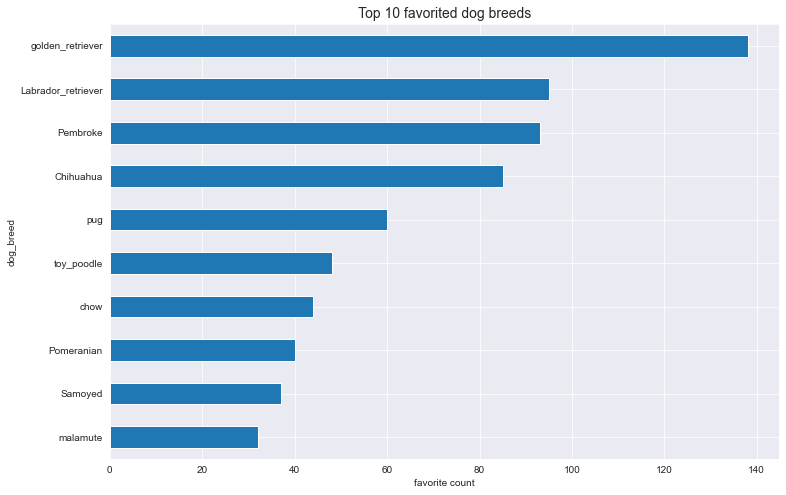

In [77]:
# plot a barchart showing count of breeds using the barChart function.
sns.set_style('darkgrid')
barChart(top_breeds, 'favorite count', 'dog_breed', 'Top 10 favorited dog breeds', (12, 8))

#### 5.4 How are ratings distributed?

In [78]:
# display counts of different ratings.
df.rating.value_counts()

12    425
10    407
11    376
13    230
9     149
8      95
7      51
5      33
6      32
14     30
3      19
4      15
2       9
1       4
0       1
Name: rating, dtype: int64

Plot a histogram showing the distribution of the ratings by first writing a function. 

In [79]:
# Define a function to plot histograms
def histChart(dataframe, x_values, x_label, y_label, size):
    df.hist(x_values, figsize=size)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

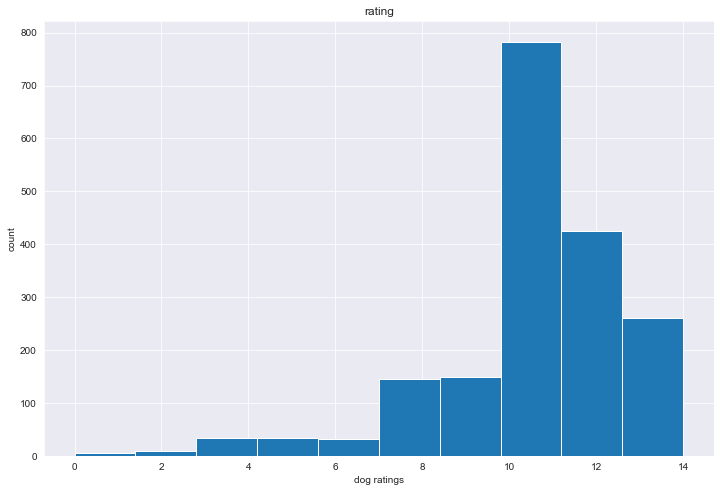

In [80]:
# plot a histogram showing the distribution of ratings. data is from the ratings column.
histChart(df.rating, 'rating', 'dog ratings', 'count', (12,8))

Ans: From the barchart, highest ratings fall between 10 and 12. A rating of 12 has 425 counts, whiile a rating of 10 has 407 counts. A low rating of 1 has only 4 counts.

### INSIGHTS FROM THE ANALYSIS
<a id='ifa'></a>

From the analysis, most people who tweeted used iphones. 1841 tweets were sent via iphone, followed by 26 via twitter web client. Only 9 tweets were via tweetdeck. We may attribute this to the fact that twitter is a social media app and most people use social media via their smart phones. 

We had four dog stages in the dataset. The highest chunk, 1585 was unclassified. 202 of the dogs were in pupper stage, 59 in doggo stage, 22 in puppo, and 8 in floofer

Most people love the retriever breed of dogs. This is evident from the barchart that shows the most favorited dog breed was golden retriever - 138 followed by labrador retriever - 95  and pembroke - 93 breeds. Chihuahua is fourth at 85. 

The dogs generally got high ratings from tweeps. I mean, dogs are lovely. Ratings were found to be highly skewed to the left. The highest rating is 12, followed by 10. One dog got a 0 rating. Past 12, the ratings tend to drop. This is because most people will rate dogs out of 10. 



#### Limitations of the analysis
We made assumptions that valid ratings were between 0 and 19 due to lack of further information as to why some ratings were too high.